## Logistic Regression

In [1]:
# Importing the libraries

import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [2]:
# Creating logistic dataset

X, y = make_blobs(n_samples = 1000,
                   n_features = 2,
                   centers = 2
                 )

In [3]:
# Checking data properties

X.dtype, y.dtype, X.shape, y.shape

(dtype('float64'), dtype('int32'), (1000, 2), (1000,))

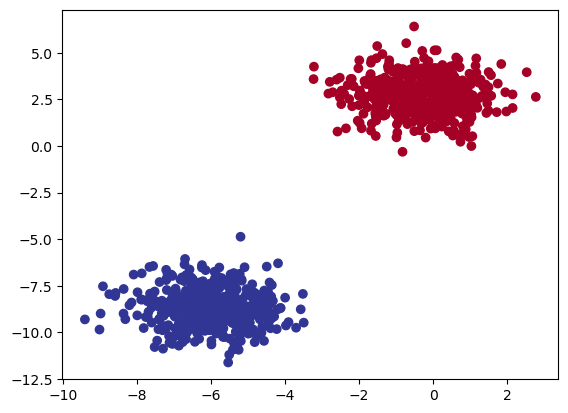

In [4]:
# Visualising the data

plt.scatter(X[:,0],X[:,1],c=y, cmap = plt.cm.RdYlBu)

In [5]:
# Preparation of data

X = torch.from_numpy(X)
y = torch.from_numpy(y).type(torch.float)

In [6]:
# Splitting into training and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)

In [7]:
# Checking the length and shape of splits

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [8]:
# Creating the regression model

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = torch.nn.Linear(2, 1,dtype = torch.float64)
        
    def forward(self, X: torch.Tensor)->torch.Tensor:
        return self.linear(X);

In [9]:
# Initialising the model

model_0 = LogisticRegressionModel()

In [10]:
# Checking model state before training

model_0.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.5612,  0.0357]], dtype=torch.float64)),
             ('linear.bias', tensor([0.0868], dtype=torch.float64))])

In [11]:
# Setting lossfn and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

In [12]:
# Creating a accuracy function

def accuracy_fn(y_true, y_pred):
    correct = torch.sum(y_true == y_pred).item()
    acc = (correct/len(y_true))*100
    return acc

In [13]:
# Creating a traning loop

epochs = 100

for epoch in range(epochs):
    model_0.train()
    
    y_logits = model_0(X_train)
    y_preds = torch.round(torch.sigmoid(y_logits)).squeeze(dim = 1)

    loss = loss_fn(y_logits.squeeze(dim = 1),y_train)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()
    
    acc = accuracy_fn(y_train,y_preds)
    with torch.inference_mode():
        y_test_logits = model_0(X_test)
        test_loss = loss_fn(y_test_logits.squeeze(dim = 1),y_test)
        
    if epoch%10 == 0:
        print(f"Epoch: {epoch}, loss: {loss:.5f}, Test_loss: {test_loss:.5f}: acc: {acc}")

Epoch: 0, loss: 0.49504, Test_loss: 0.43573: acc: 63.125
Epoch: 10, loss: 0.40300, Test_loss: 0.35650: acc: 73.25
Epoch: 20, loss: 0.33864, Test_loss: 0.30151: acc: 80.625
Epoch: 30, loss: 0.29063, Test_loss: 0.26058: acc: 88.0
Epoch: 40, loss: 0.25356, Test_loss: 0.22897: acc: 91.75
Epoch: 50, loss: 0.22427, Test_loss: 0.20395: acc: 94.125
Epoch: 60, loss: 0.20068, Test_loss: 0.18374: acc: 95.625
Epoch: 70, loss: 0.18137, Test_loss: 0.16715: acc: 97.125
Epoch: 80, loss: 0.16533, Test_loss: 0.15333: acc: 97.875
Epoch: 90, loss: 0.15185, Test_loss: 0.14166: acc: 98.375


In [14]:
y_preds = model_0(X)
with torch.inference_mode():
    print(y_preds[0:5].squeeze(dim=1),"\n", y[0:5])

# So if the pred < 0, then our model is predicting 0 else 1, And more the value is +ve or -ve more sure the predicitons are 

tensor([-2.1122,  6.9112,  6.4113, -0.8335, -1.2040], dtype=torch.float64,
       requires_grad=True) 
 tensor([0., 1., 1., 0., 0.])
